# PROJECT TITLE: FINDING THE MOST INTERESTING TWEETS AND FAN SENTIMENT DURING A GAME TELECAST IN REALTIME

# PART 1: FIFA 2018 TWEETS DATASET ANALYSIS:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## DATASET CONTEXT: 

The FIFA World Cup (often simply called the World Cup ),  being the most prestigious association football tournament, as well as the most widely viewed and followed sporting event in the world, was one of the Top Trending topics frequently on Twitter while ongoing. 


This dataset contains a random collection of 530k tweets starting from the Round of 16 till the World Cup Final that took place on 15 July, 2018 & was won by France

## DATASET CONTENT:

Data Collection:

The dataset was created using the Tweepy API, by streaming tweets from world-wide football fans before, during or after the matches.

Tweepy is a Python API for accessing the Twitter API, that provides an easy-to-use interface for streaming real-time data from Twitter. More information related to this API can be found at: http://tweepy.readthedocs.io/en/v3.5.0/


Data Pre-processing:

The dataset includes English language tweets containing any references to FIFA or the World Cup. The collected tweets have been pre-processed to facilitate analysis , while trying to ensure that any information from the original tweets is not lost. 

1. The original tweet has been stored in the column "Orig_tweet". 
2. As part of pre-processing, using the "BeautifulSoup" & "regex" libraries in Python, the tweets have been cleaned off any nuances as required for natural language processing, such as website names, hashtags, user mentions, special characters, RTs, tabs, heading/trailing/multiple spaces, among others.
3. Words containing extensions such as n't 'll 're 've have been replaced with their proper English language counterparts. Duplicate tweets have been removed from the dataset.
4. The original Hashtags & User Mentions extracted during the above step have also been stored in separate columns.

Data Storage:

The collected tweets have been consolidated into a single dataset & shared as a Comma Separated Values file "FIFA.csv".

Each tweet is uniquely identifiable by its ID, & characterized by the following attributes, per availability:

1. "Lang" - Language of the tweet
2. "Date" - When it was tweeted
3. "Source" - The device/medium where it was tweeted from
4. "len" - The length of the tweet
5. "Orig_Tweet" - The tweet in its original form
6. "Tweet" - The updated tweet after pre-processing
7. "Likes" - The number of likes received by the tweet (till the time the extraction was done)
8. "RTs" - The number of times the tweet was shared
9. "Hashtags" - The Hashtags found in the original tweet
10. "UserMentionNames" & "UserMentionID" -  Extracted from the original tweet

It also includes the following attributes about the person that the tweet is from:

1. "Name" & "Place" of the user
2. "Followers" - The number of followers that the user account has
3. "Friends" - The number of friends the user account has

In [2]:
df = pd.read_csv('FIFA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530000 entries, 0 to 529999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                530000 non-null  int64 
 1   lang              530000 non-null  object
 2   Date              530000 non-null  object
 3   Source            530000 non-null  object
 4   len               530000 non-null  int64 
 5   Orig_Tweet        530000 non-null  object
 6   Tweet             529449 non-null  object
 7   Likes             530000 non-null  int64 
 8   RTs               530000 non-null  int64 
 9   Hashtags          468457 non-null  object
 10  UserMentionNames  455841 non-null  object
 11  UserMentionID     455841 non-null  object
 12  Name              529945 non-null  object
 13  Place             390710 non-null  object
 14  Followers         530000 non-null  int64 
 15  Friends           530000 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 

## 1. Check if all Tweet IDs are unique:

In [3]:
df['ID'].is_unique

True

## 2. Check if all Tweets are in English Lang:

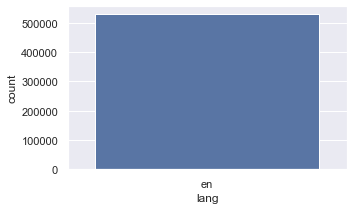

In [4]:
sns.set(rc = {'figure.figsize':(5,3)})
chart = sns.countplot(x='lang', data=df)

## 3. Check Datewise Distribution of Tweets:

In [5]:
df1 = df['Date']
date_array = []
for i in df1:
    x = i.split(" ")
    date_array.append(x[0])

date_set = []
for i in date_array:
    if i not in date_set:
        date_set.append(i)

for i in date_set:
    print("Date : ", i)
    count = date_array.count(i)
    print("Count : ", count)
    print("\n")

Date :  2018-07-02
Count :  12152


Date :  2018-07-01
Count :  100521


Date :  2018-07-03
Count :  20000


Date :  2018-07-04
Count :  15000


Date :  2018-06-30
Count :  81841


Date :  2018-06-29
Count :  486


Date :  2018-07-10
Count :  75000


Date :  2018-07-11
Count :  45000


Date :  2018-07-15
Count :  180000




## 4. Check Distribution of Sources of Tweets:

In [6]:
df1 = df['Source']
source_array = []
for i in df1:
    source_array.append(i)
    
source_set = []
for i in source_array:
    if i not in source_set:
        source_set.append(i)
        
other = 0
for i in source_set:
    count = source_array.count(i)
    if count > 1000:
        print("Source : ", i)
        print("Count : ", count)
        print("\n")
    else:
        other += count
print("Source : Others")
print("Count : ", other)

Source :  Twitter for Android
Count :  231895


Source :  Twitter Web Client
Count :  40442


Source :  Twitter for iPhone
Count :  207576


Source :  Twitter Lite
Count :  20426


Source :  Twitter for iPad
Count :  8332


Source :  Mobile Web (M2)
Count :  2239


Source :  TweetDeck
Count :  5214


Source :  Tweetbot for i?S
Count :  1050


Source :  IFTTT
Count :  1169


Source : Others
Count :  11657


## 5. Check Distribution of Length of Tweets:

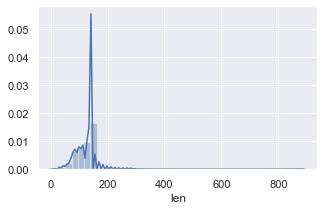

In [7]:
sns.distplot(df['len'],bins=40)

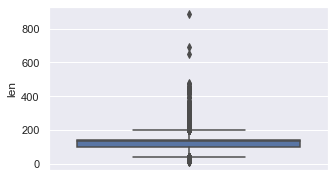

In [8]:
sns.boxplot(y='len',data=df)

## 6. Check Distribution of Likes of Tweets:

In [9]:
likes_500plus = 0
likes_200to500 = 0
likes_100to200 = 0
likes_50to100 = 0
likes_20to50 = 0
likes_0to20 = 0
for i in range(530000):
    if(df['Likes'][i] >= 500):
        likes_500plus += 1
    elif(df['Likes'][i] >= 200 and df['Likes'][i] < 500):
        likes_200to500 += 1
    elif(df['Likes'][i] >= 100 and df['Likes'][i] < 200):
        likes_100to200 += 1
    elif(df['Likes'][i] >= 50 and df['Likes'][i] < 100):
        likes_50to100 += 1
    elif(df['Likes'][i] >= 20 and df['Likes'][i] < 50):
        likes_20to50 += 1
    elif(df['Likes'][i] >= 0 and df['Likes'][i] < 20):
        likes_0to20 += 1
    else:
        continue
print("500 + Likes : ", likes_500plus)
print("200-500 Likes : ", likes_200to500)
print("100-200 Likes : ", likes_100to200)
print("50-100 Likes : ", likes_50to100)
print("20-50 Likes : ", likes_20to50)
print("0-20 Likes : ", likes_0to20)

500 + Likes :  187
200-500 Likes :  222
100-200 Likes :  282
50-100 Likes :  499
20-50 Likes :  1124
0-20 Likes :  527686


## 7. Check Distribution of ReTweets:

In [10]:
RTs_10000plus = 0
RTs_5000to10000 = 0
RTs_2000to5000 = 0
RTs_1000to2000 = 0
RTs_500to1000 = 0
RTs_0to500 = 0
for i in range(530000):
    if(df['RTs'][i] >= 10000):
        RTs_10000plus += 1
    elif(df['RTs'][i] >= 5000 and df['RTs'][i] < 10000):
        RTs_5000to10000 += 1
    elif(df['RTs'][i] >= 2000 and df['RTs'][i] < 5000):
        RTs_2000to5000 += 1
    elif(df['RTs'][i] >= 1000 and df['RTs'][i] < 2000):
        RTs_1000to2000 += 1
    elif(df['RTs'][i] >= 500 and df['RTs'][i] < 1000):
        RTs_500to1000 += 1
    elif(df['RTs'][i] >= 0 and df['RTs'][i] < 500):
        RTs_0to500 += 1
    else:
        continue
print("10000 + RTs : ", RTs_10000plus)
print("5000-10000 RTs : ", RTs_5000to10000)
print("2000-5000 RTs : ", RTs_2000to5000)
print("1000-2000 RTs : ", RTs_1000to2000)
print("500-1000 RTs : ", RTs_500to1000)
print("0-500 RTs : ", RTs_0to500)

10000 + RTs :  56012
5000-10000 RTs :  41179
2000-5000 RTs :  44118
1000-2000 RTs :  46700
500-1000 RTs :  46771
0-500 RTs :  295220


## 8. Get Top 10 Most Liked Tweets: 

In [11]:
df1 = df.sort_values(by = ['Likes'], ascending = [False])
df1.head(10)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
470179,1018552068083257344,en,2018-07-15 17:45:11,Twitter Web Client,63,"So, um, who else is missing the #WorldCup alre...",So um who else is missing the already,27042,9671,WorldCup,NaN,NaN,FIFA World Cup,"Moscow, Russia",6970800,544
431310,1018554412002893827,en,2018-07-15 17:54:30,Spredfast app,77,Dab with the #WorldCup? \r\n\r\n@paulpogba's c...,Dab with the completed it,23882,9288,WorldCup,Paul Pogba,paulpogba,Premier League,NaN,17988185,77
446280,1018553474051690496,en,2018-07-15 17:50:46,Twitter Web Client,111,#FRA are the raining/reigning #WorldCup champi...,are the raining reigning champions Sorry not s...,13954,7215,"FRA,WorldCup",NaN,NaN,FIFA World Cup,"Moscow, Russia",6970722,544
98306,1014271771288186880,en,2018-07-03 22:16:49,Twitter for Android,72,What. A. Feeling. ??\r\n\r\n#ThreeLions #ENG #...,What Feeling,10126,1937,"ThreeLions,ENG,WorldCup",NaN,NaN,Harry Kane,London,2160915,238
486297,1018551183298977792,en,2018-07-15 17:41:40,Twitter Web Client,76,Captain Hugo lifts the #WorldCup? ??\r\n\r\n#W...,Captain Hugo lifts the,8201,2143,"WorldCup,WorldCupFinal",NaN,NaN,Tottenham Hotspur,"Tottenham, London, England",2943449,341
63413,1013527594493448193,en,2018-07-01 20:59:43,Media Studio,120,Kasper Schmeichel takes the final @Budweiser #...,Kasper Schmeichel takes the final award of the...,7647,2240,"ManoftheMatch,CRODEN,WorldCup",Budweiser,Budweiser,FIFA World Cup ?,NaN,6668848,543
435321,1018554153235144704,en,2018-07-15 17:53:28,Twitter Web Client,99,Congrats #france and #croatia. You have both d...,Congrats and You have both done great job at,7481,4077,"france,croatia,worldcup",NaN,NaN,9GAG,Universe,14916831,10
386062,1018557825964896256,en,2018-07-15 18:08:04,Twitter Ads Composer,63,The first #MUFC player to find the net in a #W...,The first player to find the net in final,5403,1760,"MUFC,WorldCup",NaN,NaN,Manchester United,"Manchester, England",18221036,108
75729,1013525343527948289,en,2018-07-01 20:50:46,Twitter Web Client,165,?? @ivanrakitic scores the winning penalty to ...,scores the winning penalty to send into the qu...,4968,1059,"WorldCup,BarçaWorldCup","Ivan Rakitic,HNS | CFF","ivanrakitic,HNS_CFF",FC Barcelona,Barcelona,29314573,72
74534,1013525493335851010,en,2018-07-01 20:51:22,Twitter Web Client,177,?? Kasper Schmeichel vs Croatia:\r\n\r\n? Save...,Kasper Schmeichel vs Croatia Saves penalty in ...,4853,1225,WorldCup,NaN,NaN,SPORF,NaN,1215126,702


## 9. Get Top 10 Most ReTweeted Tweets:

In [12]:
df1 = df.sort_values(by = ['RTs'], ascending = [False])
df1.head(10)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
529999,1018628574272786438,en,2018-07-15 22:49:11,Twitter Web Client,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,?????,"Pittsburgh, PA",173,268
529965,1018628590936698881,en,2018-07-15 22:49:15,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,Rurøuni Kechøn,My Feelings,80,261
529978,1018628581738639366,en,2018-07-15 22:49:13,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,Mayz,"Manchester, England",13,36
529977,1018628583491858432,en,2018-07-15 22:49:14,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,Amanda,Somewhere with a cup of tea ??,28,86
529975,1018628584343310336,en,2018-07-15 22:49:14,Twitter for Android,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,Mugiwara-Ya,NaN,48,100
529974,1018628584766877696,en,2018-07-15 22:49:14,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,Tammy Marie ?,"Scranton, PA",1352,1155
529911,1018628611899785221,en,2018-07-15 22:49:20,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,chi-chi,NaN,489,376
529969,1018628587988152321,en,2018-07-15 22:49:15,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,Dora,"Florida, USA",56,246
529967,1018628589707722755,en,2018-07-15 22:49:15,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,||-// ??,NaN,1352,581
529912,1018628611878936576,en,2018-07-15 22:49:20,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,C.,NaN,317,427


## 10. Get a Count of Hashtags used in Tweets:

In [13]:
hashtag_array = []
hashtag_array2 = []
for i in df.Hashtags:
    hashtag_array.append(i)
hashtag_array = [x for x in hashtag_array if str(x) != 'nan']
for i in hashtag_array:
    x = i.split(',')
    for j in x:
        hashtag_array2.append(j)

In [14]:
hashtag_set = []
for i in hashtag_array2:
    if i not in hashtag_set:
        hashtag_set.append(i)
        
other = 0
for i in hashtag_set:
    count = hashtag_array2.count(i)
    if count > 1000:
        print("Hashtag : ", i)
        print("Count : ", count)
        print("\n")
    else:
        other += count
print("Hashtag : Others")
print("Count : ", other)

Hashtag :  WorldCup
Count :  398744


Hashtag :  POR
Count :  6181


Hashtag :  ENG
Count :  25165


Hashtag :  worldcup
Count :  33195


Hashtag :  PowerByEXO
Count :  7504


Hashtag :  FIFAStadiumDJ
Count :  14200


Hashtag :  Russia
Count :  1412


Hashtag :  ManoftheMatch
Count :  3121


Hashtag :  CRODEN
Count :  12480


Hashtag :  EXO
Count :  7119


Hashtag :  WORLDCUP
Count :  1857


Hashtag :  WorldCup2018
Count :  4035


Hashtag :  Croatia
Count :  6252


Hashtag :  RUS
Count :  3848


Hashtag :  DEN
Count :  8156


Hashtag :  ARG
Count :  15241


Hashtag :  ESP
Count :  6083


Hashtag :  ESPRUS
Count :  3661


Hashtag :  BRA
Count :  2558


Hashtag :  URUPOR
Count :  4749


Hashtag :  CRO
Count :  32274


Hashtag :  SWE
Count :  1144


Hashtag :  COL
Count :  1045


Hashtag :  ??
Count :  3108


Hashtag :  dafBAMA2018EXO
Count :  1245


Hashtag :  Belgium
Count :  2108


Hashtag :  Russia2018
Count :  2275


Hashtag :  FRA
Count :  66128


Hashtag :  URU
Count :  4332


Hash

## 11. Get Count of Original Tweets (Not ReTweets):

In [15]:
og_tweet_ids = []
og_tweet_ids2 = []
for i in df.UserMentionID:
    og_tweet_ids.append(i)
og_tweet_ids = [x for x in og_tweet_ids if str(x) != 'nan']
for i in og_tweet_ids:
    x = i.split(',')
    for j in x:
        og_tweet_ids2.append(j)

In [16]:
og_tweet_set = []
for i in og_tweet_ids2:
    if i not in og_tweet_set:
        og_tweet_set.append(i)
        
other = 0
for i in og_tweet_set:
    count = og_tweet_ids2.count(i)
    if count > 1000:
        print("Original Tweet ID : ", i)
        print("Count : ", count)
        print("\n")
    else:
        other += count
print("Original Tweet ID : Others")
print("Count : ", other)

Original Tweet ID :  Squawka
Count :  4113


Original Tweet ID :  FCBarcelona
Count :  2676


Original Tweet ID :  ivanrakitic
Count :  2102


Original Tweet ID :  HNS_CFF
Count :  11836


Original Tweet ID :  weareoneEXO
Count :  14974


Original Tweet ID :  FIFAWorldCup
Count :  91122


Original Tweet ID :  Budweiser
Count :  3097


Original Tweet ID :  BTS_twt
Count :  3752


Original Tweet ID :  CCFCFan1927
Count :  1007


Original Tweet ID :  England
Count :  6794


Original Tweet ID :  Footy_JokesOG
Count :  2244


Original Tweet ID :  MisterHeartz
Count :  1103


Original Tweet ID :  WCGoalz
Count :  1823


Original Tweet ID :  premierleague
Count :  6593


Original Tweet ID :  BBCMOTD
Count :  11209


Original Tweet ID :  8Fact_Footballl
Count :  2509


Original Tweet ID :  Sporf
Count :  5014


Original Tweet ID :  Football__Tweet
Count :  5244


Original Tweet ID :  realmadriden
Count :  1455


Original Tweet ID :  lukamodric10
Count :  7083


Original Tweet ID :  fussballeri

## 12. Check Distribution of Followers:

In [17]:
fol_10000plus = 0
fol_5000to10000 = 0
fol_2000to5000 = 0
fol_500to2000 = 0
fol_200to500 = 0
fol_0to200 = 0
for i in range(530000):
    if(df['Followers'][i] >= 10000):
        fol_10000plus += 1
    elif(df['Followers'][i] >= 5000 and df['Followers'][i] < 10000):
        fol_5000to10000 += 1
    elif(df['Followers'][i] >= 2000 and df['Followers'][i] < 5000):
        fol_2000to5000 += 1
    elif(df['Followers'][i] >= 500 and df['Followers'][i] < 2000):
        fol_500to2000 += 1
    elif(df['Followers'][i] >= 200 and df['Followers'][i] < 500):
        fol_200to500 += 1
    elif(df['Followers'][i] >= 0 and df['Followers'][i] < 200):
        fol_0to200 += 1
    else:
        continue
print("10000 + Followers : ", fol_10000plus)
print("5000-10000 Followers : ", fol_5000to10000)
print("2000-5000 Followers : ", fol_2000to5000)
print("500-2000 Followers : ", fol_500to2000)
print("200-500 Followers : ", fol_200to500)
print("0-200 Followers : ", fol_0to200)

10000 + Followers :  19824
5000-10000 Followers :  12810
2000-5000 Followers :  39195
500-2000 Followers :  143955
200-500 Followers :  132185
0-200 Followers :  182031


## 13. Check Distribution of Friends:

In [18]:
friend_10000plus = 0
friend_5000to10000 = 0
friend_2000to5000 = 0
friend_500to2000 = 0
friend_200to500 = 0
friend_0to200 = 0
for i in range(530000):
    if(df['Friends'][i] >= 10000):
        friend_10000plus += 1
    elif(df['Friends'][i] >= 5000 and df['Friends'][i] < 10000):
        friend_5000to10000 += 1
    elif(df['Friends'][i] >= 2000 and df['Friends'][i] < 5000):
        friend_2000to5000 += 1
    elif(df['Friends'][i] >= 500 and df['Friends'][i] < 2000):
        friend_500to2000 += 1
    elif(df['Friends'][i] >= 200 and df['Friends'][i] < 500):
        friend_200to500 += 1
    elif(df['Friends'][i] >= 0 and df['Friends'][i] < 200):
        friend_0to200 += 1
    else:
        continue
print("10000 + Friends : ", friend_10000plus)
print("5000-10000 Friends : ", friend_5000to10000)
print("2000-5000 Friends : ", friend_2000to5000)
print("500-2000 Friends : ", friend_500to2000)
print("200-500 Friends : ", friend_200to500)
print("0-200 Friends : ", friend_0to200)

10000 + Friends :  5510
5000-10000 Friends :  8252
2000-5000 Friends :  45688
500-2000 Friends :  172634
200-500 Friends :  157577
0-200 Friends :  140339


## 14. Get Top 10 Accounts With Maximum Followers:

In [19]:
df1 = df.sort_values(by = ['Followers'], ascending = [False])
df1.head(10)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
300565,1016810198500040704,en,2018-07-10 22:23:37,SocialFlow,286,As France booked its place in a first #WorldCu...,As France booked its place in first final sinc...,288,71,WorldCup,NaN,NaN,CNN,NaN,40674307,1115
298878,1016811799474106368,en,2018-07-10 22:29:59,Media Studio,199,England's #WorldCup success has inspired a sha...,Englands success has inspired sharp increase i...,125,40,WorldCup,NaN,NaN,CNN,NaN,40674306,1115
322590,1017129408447041536,en,2018-07-11 19:32:02,TweetDeck,140,RT @ESPNStatsInfo: And we're tied!\r\n\r\nIvan...,And we are tied Ivan Perisic scores his th car...,0,72,WorldCup,ESPN Stats & Info,ESPNStatsInfo,ESPN,NaN,34276268,240
75729,1013525343527948289,en,2018-07-01 20:50:46,Twitter Web Client,165,?? @ivanrakitic scores the winning penalty to ...,scores the winning penalty to send into the qu...,4968,1059,"WorldCup,BarçaWorldCup","Ivan Rakitic,HNS | CFF","ivanrakitic,HNS_CFF",FC Barcelona,Barcelona,29314573,72
376156,1018558756647522304,en,2018-07-15 18:11:46,Hootsuite Inc.,147,? He was unveiled at @FCBarcelona two years ag...,He was unveiled at two years ago today and now...,2065,567,WorldCup,"FC Barcelona,Samuel Umtiti","FCBarcelona,samumtiti",FC Barcelona,Barcelona,28832598,74
262946,1016755711731273729,en,2018-07-10 18:47:06,TweetDeck,140,RT @BBCSport: HT: #FRA 0-0 #BEL \r\n\r\nBoth s...,HT Both sides have had chances but theres no j...,0,56,"FRA,BEL,FRABEL,WorldCup","BBC Sport,BBC One","BBCSport,BBCOne",BBC News (World),"London, UK",23661420,85
171615,1013105297198649344,en,2018-06-30 17:01:40,Sprinklr Prod1,139,Penalty shootouts provide nail-biting World Cu...,Penalty shootouts provide nail biting World Cu...,46,35,WorldCup,NaN,NaN,The Economist,London,23473419,158
316304,1017130907352760320,en,2018-07-11 19:38:00,Media Studio,146,"Stay on the ball, on the pitch and in the skie...",Stay on the ball on the pitch and in the skies...,65,24,WorldCup,NaN,NaN,Reuters Top News,Around the world,19868018,1074
320337,1017129900757487616,en,2018-07-11 19:34:00,Media Studio,129,Thousands party on Paris's Champs Elysees afte...,Thousands party on Pariss Champs Elysees after...,159,66,WorldCup,NaN,NaN,Reuters Top News,Around the world,19868017,1074
302027,1016808920407597056,en,2018-07-10 22:18:32,trueAnthem,101,What now for Neymar after image-shattering Wor...,What now for Neymar after image shattering Wor...,55,22,NaN,NaN,NaN,Reuters Top News,Around the world,19865478,1074


## 15. Get Top 10 Accounts With Maximum Friends:

In [20]:
df1 = df.sort_values(by = ['Friends'], ascending = [False])
df1.head(10)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
362441,1018360565591355393,en,2018-07-15 05:04:13,Twitter Web Client,140,RT @SMignolet: Perfect way to end this @FIFAWo...,Perfect way to end this by giving our country ...,0,1041,NaN,"Simon Mignolet,FIFA World Cup ?","SMignolet,FIFAWorldCup",J.D.,"Ohio, United States",1023880,539961
362412,1018360618766815232,en,2018-07-15 05:04:26,Twitter Web Client,140,RT @VincentKompany: ???? I’d like to thank my ...,d like to thank my teammates all staff members...,0,2191,NaN,Vincent Kompany,VincentKompany,J.D.,"Ohio, United States",1023880,539961
362801,1018359515455066112,en,2018-07-15 05:00:03,Twitter Web Client,140,RT @BelRedDevils: ???????\r\n\r\nWe are #REDTO...,We are This is history We love you fans Proud ...,0,5968,REDTOGETHER,"Belgian Red Devils,Belgian Football,fanclub1895","BelRedDevils,Belgianfootball,Fanclub1895",J.D.,"Ohio, United States",1023880,539961
279066,1016787683534917633,en,2018-07-10 20:54:09,Twitter for iPhone,140,RT @wefollowbackd: Samuel Umtiti goal sends Fr...,Samuel Umtiti goal sends France through to Wor...,0,1,Mbappe,"Footbal, News, Sport and Fun",wefollowbackd,"Footbal, News, Sport and Fun","Hengelo, Overijssel",553100,525955
35600,1013542254101843968,en,2018-07-01 21:57:58,Twitter Web Client,230,#QuarterFinal: Uruguay vs France: Who is going...,Uruguay vs France Who is going to winn,5,3,"QuarterFinal,WC2018,Russia,Kroatia,WorldCup201...",NaN,NaN,"Footbal, News, Sport and Fun","Hengelo, Overijssel",551283,523691
28756,1013548741775720448,en,2018-07-01 22:23:45,Twitter for iPhone,139,RT @wefollowbackd: Last 16 Belgium vs Japan : ...,Last Belgium vs Japan Who is going to win,0,1,"WC2018,Belgium,Japan,WorldCup2018,WorldCupRuss...","Footbal, News, Sport and Fun",wefollowbackd,"Footbal, News, Sport and Fun","Hengelo, Overijssel",551279,523688
28731,1013548774898233345,en,2018-07-01 22:23:53,Twitter for iPhone,139,RT @wefollowbackd: Last 16 Brazil vs Mexico: W...,Last Brazil vs Mexico Who is going to winn,0,1,"WC2018,Brazil,Mexico,WorldCup2018,WorldCupRuss...","Footbal, News, Sport and Fun",wefollowbackd,"Footbal, News, Sport and Fun","Hengelo, Overijssel",551279,523688
28769,1013548728035303424,en,2018-07-01 22:23:42,Twitter for iPhone,139,RT @wefollowbackd: Last 16 England vs Colombia...,Last England vs Colombia Who is going to win,0,2,"WC2018,England,Colombia,WorldCup2018,WorldCupR...","Footbal, News, Sport and Fun",wefollowbackd,"Footbal, News, Sport and Fun","Hengelo, Overijssel",551279,523688
28956,1013548496404836358,en,2018-07-01 22:22:47,Twitter for iPhone,140,RT @wefollowbackd: #QuarterFinal: Uruguay vs F...,Uruguay vs France Who is going to winn,0,3,"QuarterFinal,WC2018,Russia,Kroatia,WorldCup201...","Footbal, News, Sport and Fun",wefollowbackd,"Footbal, News, Sport and Fun","Hengelo, Overijssel",551279,523688
28744,1013548761790992385,en,2018-07-01 22:23:50,Twitter for iPhone,140,RT @wefollowbackd: Last 16 Sweden vs Switzerla...,Last Sweden vs Switzerland Who is going to win,0,1,"WC2018,Sweden,Switzerland,WorldCup2018,WorldCu...","Footbal, News, Sport and Fun",wefollowbackd,"Footbal, News, Sport and Fun","Hengelo, Overijssel",551279,523688


# INFERENCES:

1. All IDs of Tweets are Unique thus no Tweet is repeated.
2. All Tweets are in English Language.
3. Tweets can be Dishtinguished amongst based on Date and Source.
4. Maximum Tweets are between 100 and 200 Characters.
5. The Like and Retweet Distributions show us the most Interesting Tweets.
6. For the purpose of this project we can assume that fans who liked / retweeted the tweets agree with the tweet context and thus the quantity of likes and retweets can later be considered as weights for aggregate sentiment analysis.
7. Extracted Hashtags can be saved seperately in a different table in order to identify which teams the hashtags refer to.
8. The UserMentionedName/ID might count shows the counts of retweets done for a particular user, can be useful to analyse the most popular users.
9. The Friends and Followers Analysis shows the most popular user accounts.
10. The place attribute can be used later on in project to identify country with the geopy api.

# CONCLUSION:

The Following Attributes will be useful for Country / Team Identification, Aggregate Sentiment Analysis further:
1. Datetime
2. Tweet
3. Likes
4. RTs (represnts usermentionedname/id quantitatively making them redundant columns)
5. Hashtags
6. Place